## Importing

In [1]:
import cv2
import imutils
import numpy as np
from matplotlib import pyplot as plt
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\sefas\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'

## Create Detection Function

In [2]:
def detectPlateText(img):
    img = cv2.resize(img, (600,400) )
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    gray = cv2.bilateralFilter(gray, 13, 15, 15) 

    edged = cv2.Canny(gray, 30, 200) 
    contours = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]
    screenCnt = None

    for c in contours:

        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.018 * peri, True)

        if len(approx) == 4:
            screenCnt = approx
            break

    if screenCnt is None:
        detected = 0
        print ("No contour detected")
    else:
         detected = 1

    if detected == 1:
        cv2.drawContours(img, [screenCnt], -1, (0, 0, 255), 3)

    mask = np.zeros(gray.shape,np.uint8)
    new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
    new_image = cv2.bitwise_and(img,img,mask=mask)

    (x, y) = np.where(mask == 255)
    (topx, topy) = (np.min(x), np.min(y))
    (bottomx, bottomy) = (np.max(x), np.max(y))
    Cropped = gray[topx:bottomx+1, topy:bottomy+1]

    text = pytesseract.image_to_string(Cropped, config='--psm 11')

    print("Detected license plate Number is:",text)
    img = cv2.resize(img,(500,300))
    Cropped = cv2.resize(Cropped,(400,200))
    cv2.imshow('car',img)
    cv2.imshow('Cropped',Cropped)

    cv2.waitKey(0)
    cv2.destroyAllWindows()

## Detection Samples

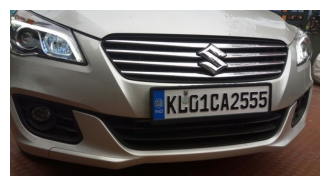

In [3]:
img = cv2.imread('.\Cars0.png',cv2.IMREAD_COLOR)
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [4]:
detectPlateText(img)

Detected license plate Number is: KLG10A2555



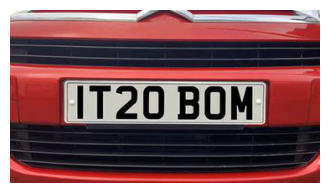

In [5]:
img = cv2.imread('.\Cars1.png',cv2.IMREAD_COLOR)
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [6]:
detectPlateText(img)

Detected license plate Number is: 1720 BOM



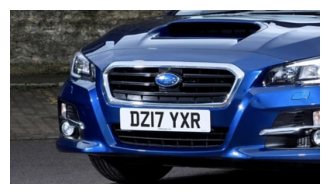

In [9]:
img = cv2.imread('.\Cars3.png',cv2.IMREAD_COLOR)
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [10]:
detectPlateText(img)

Detected license plate Number is: -DZI7 YXR |



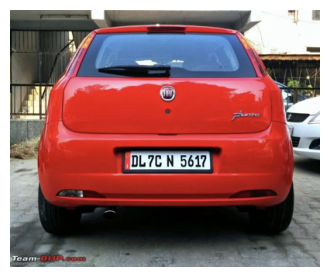

In [13]:
img = cv2.imread('.\Cars5.png',cv2.IMREAD_COLOR)
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [14]:
detectPlateText(img)

Detected license plate Number is: DL7C N 5617)



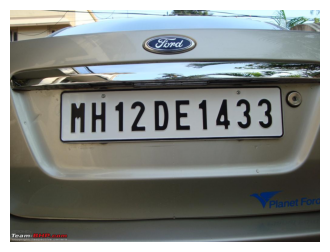

In [17]:
img = cv2.imread('.\Cars7.png',cv2.IMREAD_COLOR)
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [18]:
detectPlateText(img)

Detected license plate Number is: 'MH12DE1433

